In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
frame = pd.read_csv('train.csv')
print frame.shape

(15120, 56)


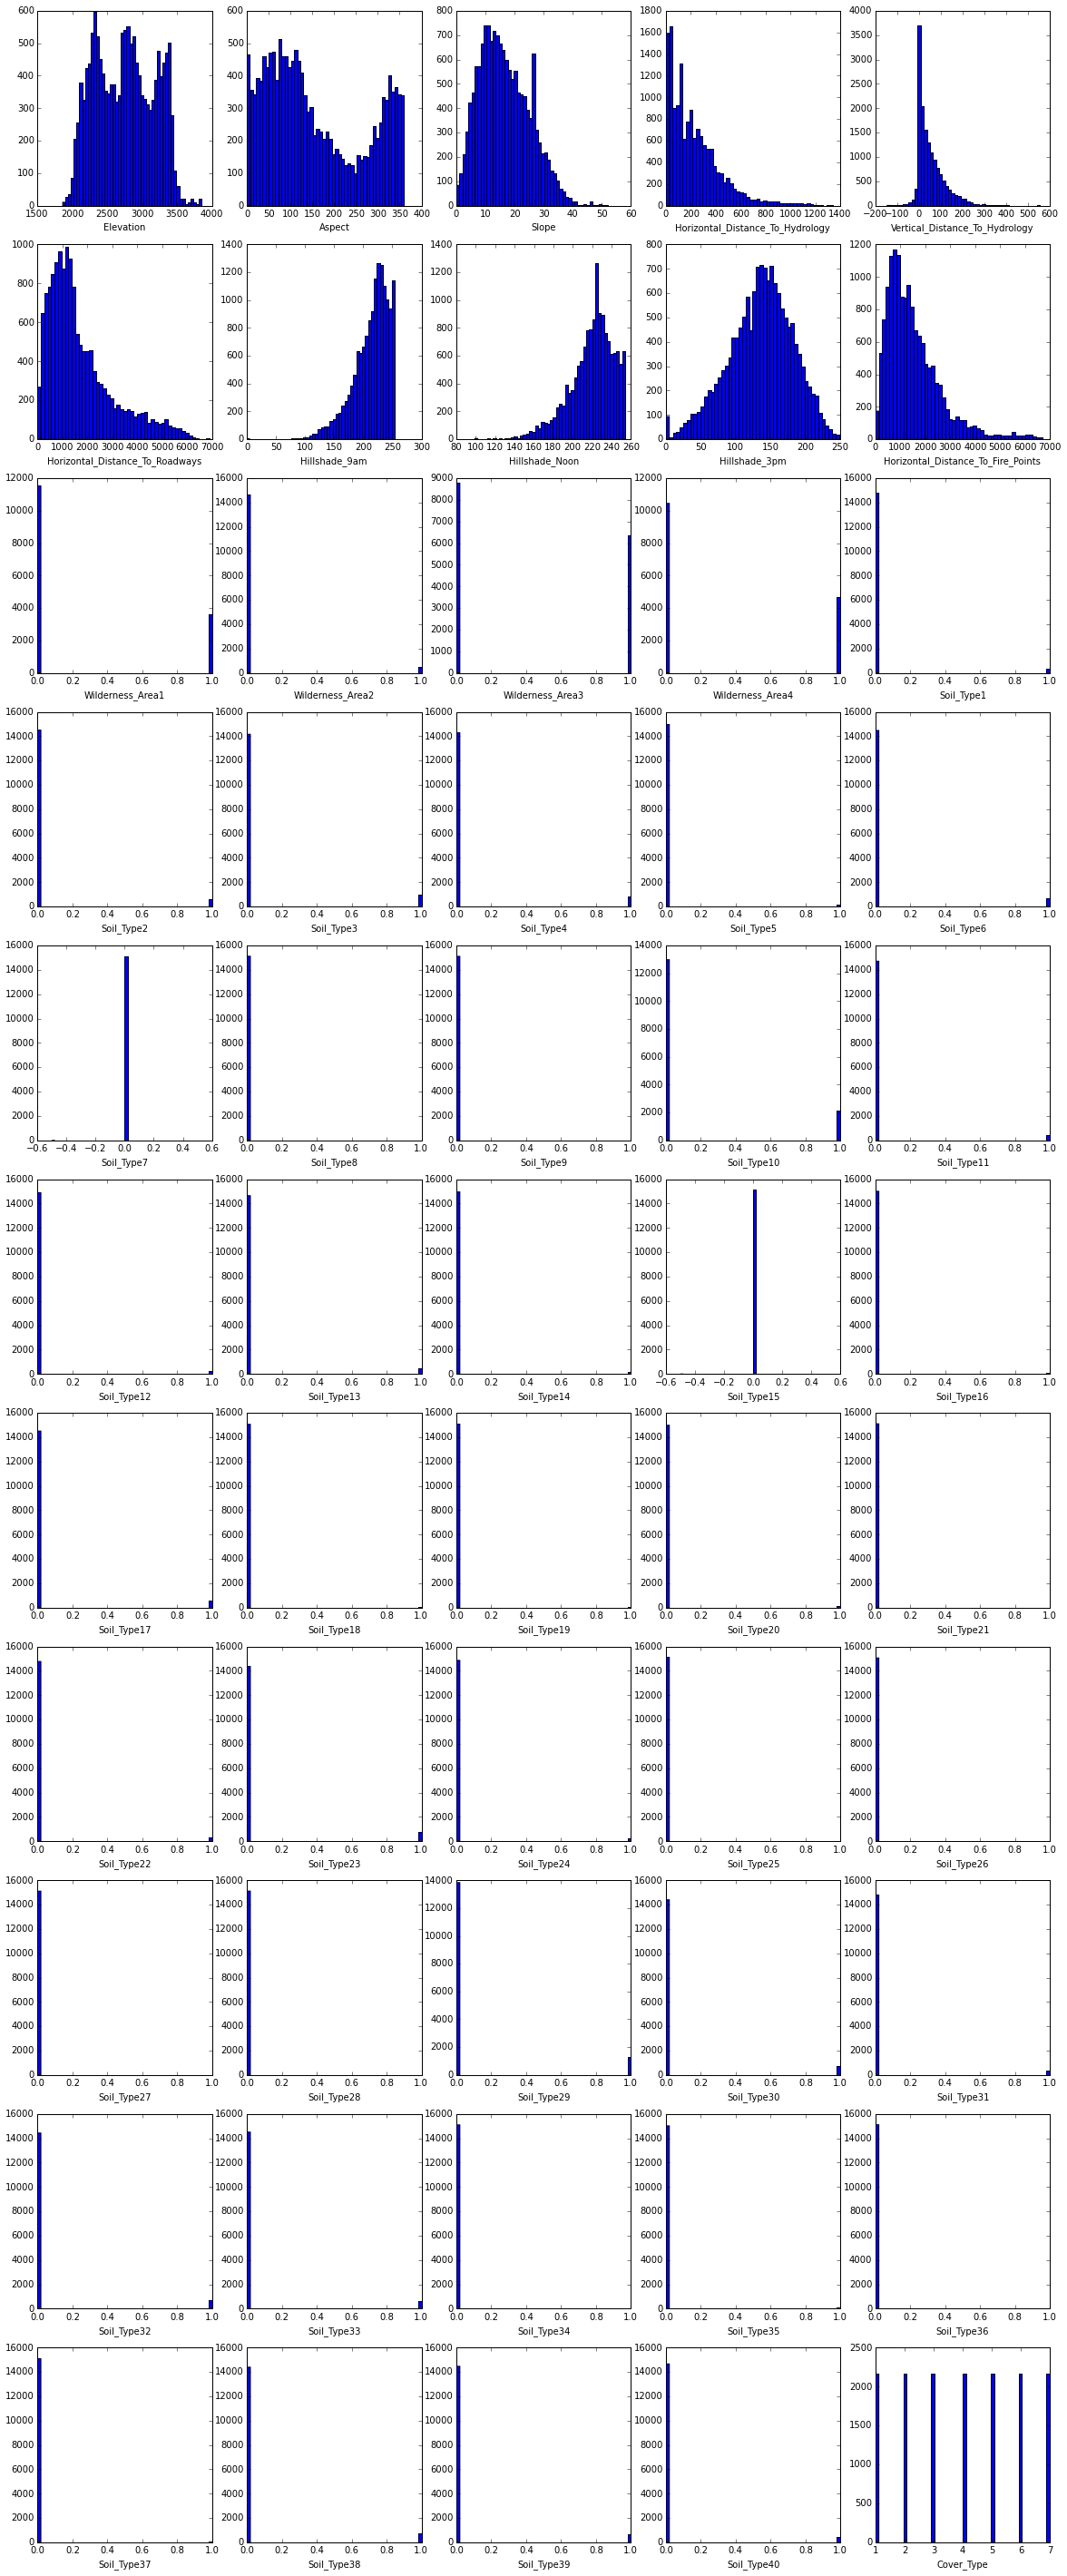

In [36]:
plt.figure(figsize=(20, 50))
nrows = 11
ncols = 5
for i in range(1, frame.shape[1]):
    data = frame.ix[:, i:i+1]
    sb = plt.subplot(nrows, ncols, i)
    plt.hist(data[data.columns.values[0]], bins=50)
    plt.xlabel(data.columns.values[0])
    
plt.show()

In [41]:
data = frame[['Soil_Type15']]
len(data['Soil_Type15'] != 0)

15120

In [49]:
import numpy as np

ff = "/Users/malinimittal/Programming/W207/forest_cover/train.csv" # you will need to edit this directory
f = open(ff)
column_names = f.readline() # you'd needs this ordinarily

data = np.loadtxt(f, delimiter=",")

y, X = data[:, -1:], data[:, :-1]

ff_test = "/Users/malinimittal/Programming/W207/forest_cover/test.csv" # you will need to edit this directory
f_test = open(ff_test)
column_names_test = f_test.readline() # you'd needs this ordinarily

data_test = np.loadtxt(f_test, delimiter=",")

# note there are no labels here!
X_test = data_test

print X_test.shape

(565892, 55)


In [50]:
print y

[[ 5.]
 [ 5.]
 [ 2.]
 ..., 
 [ 3.]
 [ 3.]
 [ 3.]]


In [48]:
print X.shape

(15120, 55)


In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_train, X_train = y[:1000], X[:1000, :]

y_dev, X_dev = y[1000:2000], X[1000:2000]

kn = KNeighborsClassifier(n_neighbors=10)

kn.fit(X_train, y_train)

# here's what we need to send back to Kaggle
preds = kn.predict(X_dev)

print "Confusion matrix:\n%s" % confusion_matrix(y_dev, preds)
print "\nprecision = %s\n" % (kn.score(X_dev, y_dev))

Confusion matrix:
[[ 16 178   0   0  68   0   0]
 [  0 199   0   0  43   0   0]
 [  0  43   0   0   0   0   0]
 [  0   2   0   0   0   0   0]
 [  0 329   0   0   0   0   0]
 [  0  36   0   0   0   0   0]
 [  0  86   0   0   0   0   0]]

precision = 0.215



/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [63]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
score = model.score(X_dev, y_dev)
print 'GaussianNB score: %.3f' % (score)

GaussianNB score: 0.362


/Library/Python/2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
score = lr.score(X_dev, y_dev)
print 'LinearRegression score: %.3f' % (score)

LinearRegression score: -0.079


In [76]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_dev)
score = lr.score(X_dev, y_dev)
print 'LogisticRegression score: %.3f' % (score)
print "Confusion matrix:\n%s" % confusion_matrix(y_dev, preds)

LogisticRegression score: 0.509
Confusion matrix:
[[172  61   0   0  29   0   0]
 [ 69 130   0   0  43   0   0]
 [  0  10   0   0  33   0   0]
 [  0   0   0   0   2   0   0]
 [ 23  99   0   0 207   0   0]
 [  0  19   0   0  17   0   0]
 [ 86   0   0   0   0   0   0]]


/Library/Python/2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
#preprocessing
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_dev = scaler.transform(X_dev)

lr.fit(scaled_X_train, y_train)
preds = lr.predict(scaled_X_dev)
score = lr.score(scaled_X_dev, y_dev)
print 'LogisticRegression score: %.3f' % (score)
print "Confusion matrix:\n%s" % confusion_matrix(y_dev, preds)

LogisticRegression score: 0.489
Confusion matrix:
[[123 110   0   0  29   0   0]
 [ 64 137   0   0  41   0   0]
 [  0  11   0   0  32   0   0]
 [  0   0   0   0   2   0   0]
 [  3  97   0   0 229   0   0]
 [  0  31   0   0   5   0   0]
 [ 86   0   0   0   0   0   0]]


/Library/Python/2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
